# Fitting experimental SAXS and WAXS curve of a CsPbBr3 rhombic dodecahedron 

Simulated curve computed using our rhombic dodecahedron pyNanoMatBuilder model (Wulff construction) and DebyeCalculator

In [173]:
import numpy as np
import matplotlib.pyplot as plt


### Load experimental data

### solvent substraction

lambda*I + (or -) background (small value)

(background = aq + b) x lambda

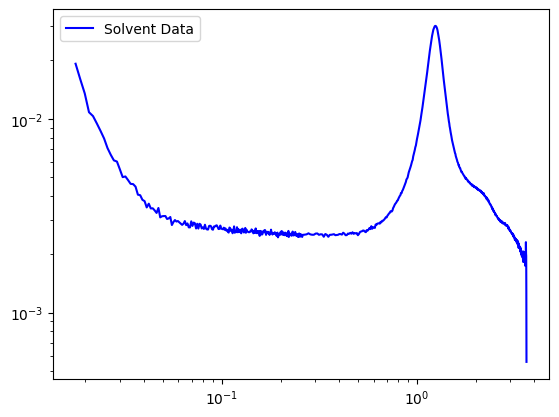

In [174]:
solvant_file = "benjamin_dodecahedrons/cyclohexane_0_00007_azimAvg_smartavg_merged.dat"
data_solvant = load_numeric_only(solvant_file)
q_solvant = data_solvant[:, 0]
I_solvant = data_solvant[:, 1]
plt.loglog(q_solvant, I_solvant, label="Solvent Data", color='blue')
plt.legend()


q_exp length 791
I_exp length 791


Text(0.5, 1.0, 'Experimental SAXS Data from Dodecahedron Sample')

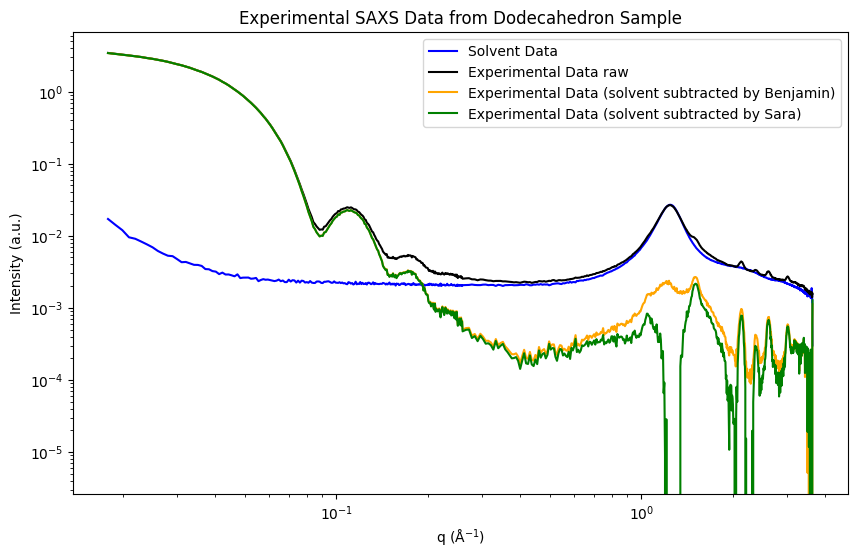

In [175]:
import numpy as np
import io



def load_numeric_only(path):
    numeric_lines = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            # skip empty and explicit comments
            if not s or s.startswith('#') or s.lower().startswith('q(A-1)'):
                continue
            parts = s.split()
            # try to convert all tokens to float; if fail => header line -> skip
            try:
                [float(x) for x in parts]
            except ValueError:
                # not a numeric data row (header like "q(A-1) ...") -> skip
                continue
            numeric_lines.append(s)
    if not numeric_lines:
        raise ValueError("Aucune ligne numérique trouvée dans le fichier.")
    data = np.loadtxt(io.StringIO("\n".join(numeric_lines)))
    return data


path = r"benjamin_dodecahedrons/AS3161_bis_0_00007_azimAvg_smartavg_merged.dat"
path_2 = r"benjamin_dodecahedrons/AS3161_bis_0_00007_azimAvg_smartavg_merged_sub_0p81.dat"

solvant_file = "benjamin_dodecahedrons/cyclohexane_0_00007_azimAvg_smartavg_merged.dat"
data_solvant = load_numeric_only(solvant_file)
q_solvant = data_solvant[:, 0]
I_solvant = data_solvant[:, 1]




data = load_numeric_only(path)
q_exp = data[:, 0]
I_exp = data[:, 1]
print("q_exp length", len(q_exp))
print("I_exp length", len(I_exp))

data_2 = load_numeric_only(path_2)
q_exp_sub_benj = data_2[:, 0]
I_exp_sub_benj = data_2[:, 1]



background = 0.0001*q_exp-0.001

Iq_exp_new = I_exp -  (I_solvant*0.9 - 0.0002)

plt.figure(figsize=(10,6))
#plt.loglog(q_solvant, I_solvant*0.90-0.0001, label="Solvent Data", color='blue')
# plt.loglog(q_solvant, (I_solvant + background), label="Solvent Data", color='blue')
plt.loglog(q_solvant, I_solvant*0.9 - 0.0002, label="Solvent Data", color='blue')
plt.loglog(q_exp, I_exp, label="Experimental Data raw", color='black')
plt.loglog(q_exp_sub_benj, I_exp_sub_benj, label="Experimental Data (solvent subtracted by Benjamin)", color='orange')
plt.loglog(q_exp, Iq_exp_new, label="Experimental Data (solvent subtracted by Sara)", color='green')
plt.legend()
plt.xlabel("q (Å$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Experimental SAXS Data from Dodecahedron Sample")




#### Plot the experimental data and all the simulated curves (different sizes around 9 nm)

Scale difference experimental / debye at q=0.017 A-1 : 4.319711661393226


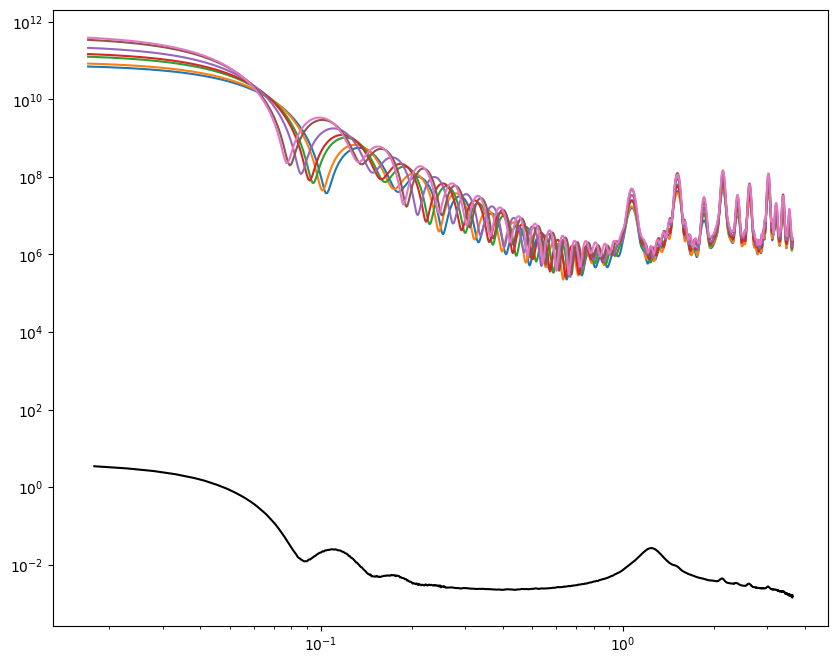

In [29]:


# Informations for normalization

size = [75, 80, 85, 90, 95, 100, 105]
atoms = [8059, 9139, 10941, 12261, 14447, 18625, 20497]
Z_Br = 35
Z_Cs = 55
Z_Pb = 82
Z = (Z_Cs + Z_Pb + 3* Z_Br)/ 5

# verify if the intensities of different sizes are proportional to the volume of the cell
volume_cell =  202.365 # A^3

plt.figure(figsize=(10,8))
# I_exp = I_exp - I_solvant
plt.loglog(q_exp, I_exp, label="Experimental Data", color='black')

for i,t in enumerate(size):
    N = atoms[i]
    data_debye = np.loadtxt(f"benjamin_dodecahedrons/debye_dode/dode_{t}_debye.txt")
    q_debye = data_debye[:, 0] 
    I_debye = data_debye[:, 1] 

    # keep only the same number of points in I_exp
    # exp is defined on : 0.01 to 3.64
    mask = (q_debye > 0.017) & (q_debye < 3.64)
    q_debye = q_debye[mask]
    I_debye = I_debye[mask]

    # plt.loglog(q_debye, I_debye*2/(N**2 * Z**2), label=f"Debye Model {N} atoms")
    plt.loglog(q_debye, I_debye, label=f"Debye Model {N} atoms")


scale_diff =  (I_exp[0]-0.001/0.86)/ (I_debye[0]*2/(N**2 * Z**2))
print("Scale difference experimental / debye at q=0.017 A-1 :", scale_diff)




### Fitting on both SAXS and WAXS
#### Informations regarding the pretreatment:
- The simulated data was computed taking in account polydispersity (either by specifying the sizes and ajdusting the weights myself) = maybe  not the best way to do it
- The experimental data has no pre treatment
- A scale factor was applied to compare the data

available_sizes: [75, 80, 85, 90, 95, 100, 105]
sel_sizes: [75, 80, 85, 90, 95, 100, 105]
Simulated common q-range across selected files: [0.017, 3.4]
q_common range to use: [0.017, 3.4]
weights: [0.05, 0.05, 0.15, 0.25, 0.3, 0.15, 0.05]
sum of the weights: 1.0
len(sel_sizes): 7
len(q_common)= 751
len(I_exp_common)= 751
len(I_weighted)= 751


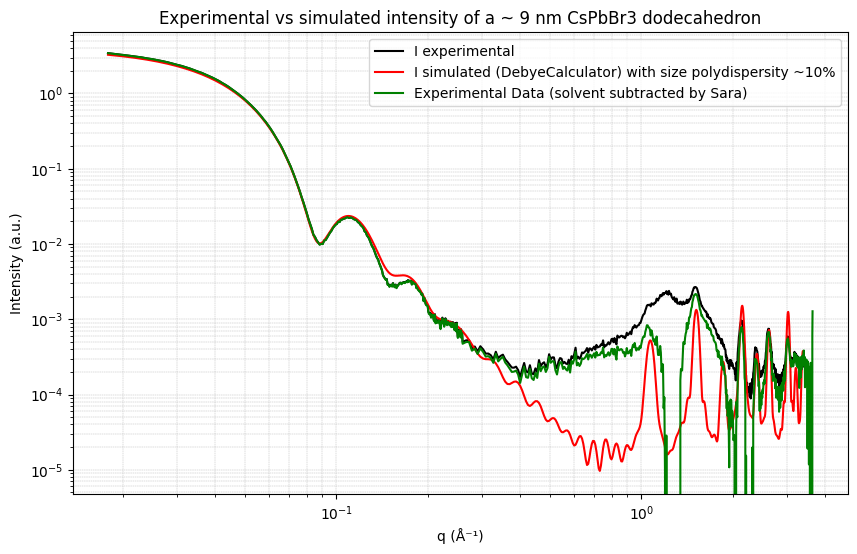

scale_factor 1.748553941146415e-11


In [176]:
import numpy as np
import glob, re

path = r"benjamin_dodecahedrons/AS3161_bis_0_00007_azimAvg_smartavg_merged_sub_0p81.dat"
data = load_numeric_only(path)
q_exp = data[:, 0]
I_exp = data[:, 1]



# Parameters of the polydispersity
qmin, qmax = 0.017, 3.4   # q range to compare
central_size = 95
use_range = False
range_min, range_max = 90, 105 # range of the polydispersity

# List of files and sizes
pattern = "benjamin_dodecahedrons/debye_dode/dode_*_debye.txt"
file_paths = sorted(glob.glob(pattern))
if len(file_paths) == 0:
    raise RuntimeError("Aucun fichier simulé trouvé. Vérifiez le pattern.")

available_sizes = []
file_map = {}
for p in file_paths:
    m = re.search(r'dode_(\d+)_debye\.txt$', p)
    if m:
        t = int(m.group(1))
        available_sizes.append(t)
        file_map[t] = p
available_sizes = np.array(sorted(set(available_sizes)), dtype=int)
print("available_sizes:", available_sizes.tolist())

# Sélectionner les tailles contenues dans la polydispersité (soit par range comme 80 angs à 100 angs, soit par gaussienne)
if use_range:
    sel_mask = (available_sizes >= range_min) & (available_sizes <= range_max)
    sel_sizes = available_sizes[sel_mask]
else:
    sigma = max(1.0, central_size * 0.10)
    raw_w = np.exp(-0.5 * ((available_sizes - central_size) / sigma) ** 2)
    sel_mask = np.abs(available_sizes - central_size) <= 3 * sigma
    sel_sizes = available_sizes[sel_mask]
if sel_sizes.size == 0:
    raise RuntimeError("Aucune taille simulée sélectionnée (sel_sizes vide).")

print("sel_sizes:", sel_sizes.tolist())

# Trouver l'intersection des plages q couvertes par les fichiers simulés sélectionnés 
min_qs = []
max_qs = []
for t in sel_sizes:
    p = file_map.get(int(t))
    if p is None:
        continue
    data = np.loadtxt(p)
    qd = data[:,0]
    mask_range = (qd >= qmin) & (qd <= qmax)
    if np.any(mask_range):
        qd_sel = qd[mask_range]
        min_qs.append(qd_sel.min())
        max_qs.append(qd_sel.max())
    else:
        # Ce simulateur ne couvre pas la fenêtre qmin..qmax : on l'ignore pour l'intersection
        print(f"simulateur {t} n'a pas de points dans [{qmin},{qmax}] -> ignoré pour l'intersection")

if len(min_qs) == 0:
    raise RuntimeError("Aucun simulateur ne couvre la fenêtre q choisie.")

# plage commune strictement couverte par TOUS les simulateurs retenus
min_sim = max(min_qs)
max_sim = min(max_qs)
print(f"Simulated common q-range across selected files: [{min_sim:.6g}, {max_sim:.6g}]")

# maintenant intersecter avec la plage expérimentale choisie
q_common_min = max(qmin, min_sim)
q_common_max = min(qmax, max_sim)
if q_common_max <= q_common_min:
    raise RuntimeError("Intersection des plages q vide : agrandir qmin/qmax ou réduire la sélection de simulateurs.")

print(f"q_common range to use: [{q_common_min:.6g}, {q_common_max:.6g}]")

# construire q_common avec le même nombre de points que q_exp dans [qmin,qmax] ---
mask_exp = (q_exp >= qmin) & (q_exp <= qmax)
q_exp_cut = q_exp[mask_exp]
I_exp_cut = I_exp[mask_exp]
if q_exp_cut.size == 0:
    raise RuntimeError("Aucune donnée expérimentale dans la plage qmin..qmax.")

# garder seulement les points expérimentaux qui tombent dans [q_common_min, q_common_max]
mask_qc = (q_exp_cut >= q_common_min) & (q_exp_cut <= q_common_max)
q_common = q_exp_cut[mask_qc]


#  Interpoler I_exp sur q_common (pour garantir même longueur) 
I_exp_common = np.interp(q_common, q_exp, I_exp)

# Construire I_weighted par interpolation des simulations sur q_common 
# Si vous avez une liste de poids 'weights' correspondant à sel_sizes, utilisez-la; sinon poids uniformes.
try:
    weights  # si défini précédemment dans le notebook
except NameError:
    weights = np.ones(sel_sizes.shape, dtype=float)
weights = weights / np.sum(weights)
print("weights:", weights.tolist())

weights = [0.05,0.05,0.15,0.25, 0.30, 0.15 , 0.05]  # exemple de poids pour 5 tailles
print("sum of the weights:", sum(weights))
print("len(sel_sizes):", len(sel_sizes))
I_weighted = np.zeros_like(q_common, dtype=float)
for t, w in zip(sel_sizes, weights):
    p = file_map.get(int(t))
    if p is None:
        continue
    data = np.loadtxt(p)
    qd, Id = data[:,0], data[:,1]
    # restreindre au window q_common_min..q_common_max avant interpolation
    mask_sim = (qd >= q_common_min) & (qd <= q_common_max)
    qd_sel = qd[mask_sim]
    Id_sel = Id[mask_sim]
    if qd_sel.size == 0:
        print(f"simulateur {t} n'a pas de points dans la plage commune -> ignoré")
        continue
    I_interp = np.interp(q_common, qd_sel, Id_sel, left=0.0, right=0.0)
    
    # normalisation par N si atoms_map existe (optionnel)
    if 'size' in globals() and 'atoms' in globals():
        # construire atoms_map si nécessaire
        try:
            atoms_map
        except NameError:
            atoms_map = dict(zip(size, atoms))
        if int(t) in atoms_map:
            N_t = atoms_map[int(t)]
            # I_interp = I_interp * 2.0 / (N_t**2 * Z**2)
            I_interp = I_interp 
    I_weighted += w * I_interp

# --- Vérification des longueurs et fit ---
print("len(q_common)=", len(q_common))
print("len(I_exp_common)=", len(I_exp_common))
print("len(I_weighted)=", len(I_weighted))
if len(I_exp_common) != len(I_weighted):
    raise RuntimeError("Lengths still mismatch after interpolation — debug lengths above.")

# Option: fit linéaire I_exp_common = A * I_weighted + B
# valid = np.isfinite(I_exp_common) & np.isfinite(I_weighted) & (I_weighted > 0)
# if valid.sum() < 5:
#     print("Attention: trop peu de points valides pour un fit stable.")
# else:
#     A, B = np.polyfit(I_weighted[valid], I_exp_common[valid], 1)
#     print("A =", A, "B =", B)

# # fitted exp data
# I_exp_fitted =  (I_exp_common - B) / A

# tracer comparaison
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.loglog(q_common, I_exp_common, label='I experimental', color='k')
plt.loglog(q_common, I_weighted*1.6654399360431843e-11, label='I simulated (DebyeCalculator) with size polydispersity ~10%', color='r')
plt.loglog(q_exp, Iq_exp_new, label="Experimental Data (solvent subtracted by Sara)", color='green')
#plt.loglog(q_common, I_exp_fitted, label='I_sim polydisperse fitté')

plt.xlabel('q (Å⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Experimental vs simulated intensity of a ~ 9 nm CsPbBr3 dodecahedron')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.3)
plt.show()

scale_factor = I_exp_common[0]/I_weighted[0]
print("scale_factor", scale_factor)

### Computing polydispersity actually using a gaussian + instrumental contribution

weights: [0.00633722 0.34600076 0.57045881 0.0772032 ]
sum of weights: 1.0000000000000002


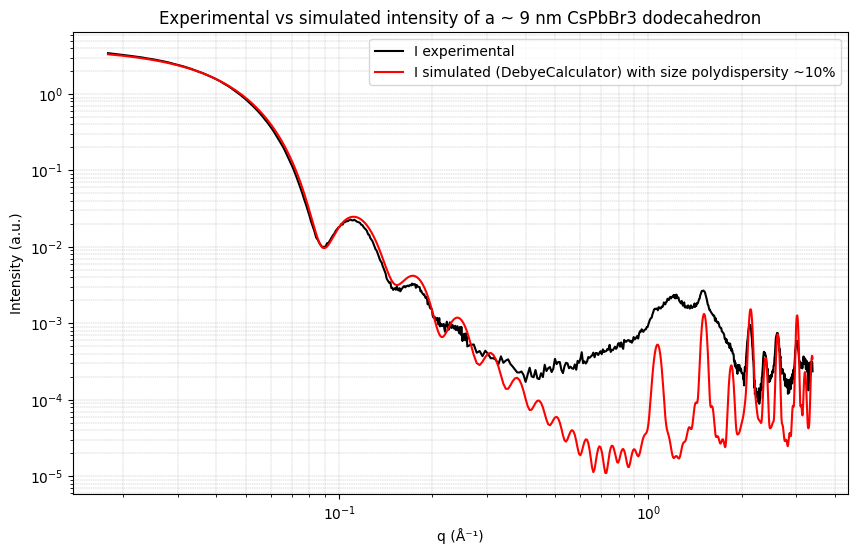

scale_factor 1.7224965406390953e-11


In [154]:
from scipy.ndimage import gaussian_filter1d

# cheap smearing: appliquer gaussian_filter1d sur I_sim(q) avant interpolation

sigma_q_pixels = 5
available_sizes = np.array( [80, 90, 95, 105])
center = 95
sigma = 5.0        # 1-sigma en Å (ou relative=True pour fraction)
sizes = available_sizes
weights = np.exp(-0.5 * ((sizes - center)/sigma)**2)
weights /= weights.sum()


print("weights:", weights)
print("sum of weights:", sum(weights))

# Maintenant on récupère/interpole les simulations disponibles pour ces sizes.
# Si tu as fichiers simulés EXACTEMENT pour ces sizes -> charge direct.
# Sinon, si tu as une bibliothèque dense (file_map keyed by integer sizes), interpoles entre fichiers proches.

I_polyd = np.zeros_like(q_common, dtype=float)
for s, wi in zip(available_sizes, weights):
    # si tu as un fichier exact:
    if int(s) in file_map:
        data_sim = np.loadtxt(file_map[int(s)])
        qd, Id = data_sim[:,0], data_sim[:,1]
        Id = gaussian_filter1d(Id, sigma=sigma_q_pixels)
        I_interp = np.interp(q_common, qd, Id)
   
    I_polyd += wi * I_interp

# I_polyd est ton profil polydispersé (avant échelle A et offset B)

# tracer comparaison
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.loglog(q_common, I_exp_common, label='I experimental', color='k')
plt.loglog(q_common, I_polyd*1.6654399360431843e-11, label='I simulated (DebyeCalculator) with size polydispersity ~10%', color='r')
#plt.loglog(q_common, I_exp_fitted, label='I_sim polydisperse fitté')

plt.xlabel('q (Å⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Experimental vs simulated intensity of a ~ 9 nm CsPbBr3 dodecahedron')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.3)
plt.show()

scale_factor = I_exp_common[0]/I_polyd[0]
print("scale_factor", scale_factor)

### Only SAXS

available_sizes: [75, 80, 85, 90, 95, 100, 105]
sel_sizes: [85, 90, 95, 100, 105]
Simulated common q-range across selected files: [0.017, 0.5]
q_common range to use: [0.017, 0.5]
q_common using 277 experimental points inside intersection
len(q_common)= 277
len(I_exp_common)= 277
len(I_weighted)= 277
A = 3.9248718794920623 B = -0.006125563708826951


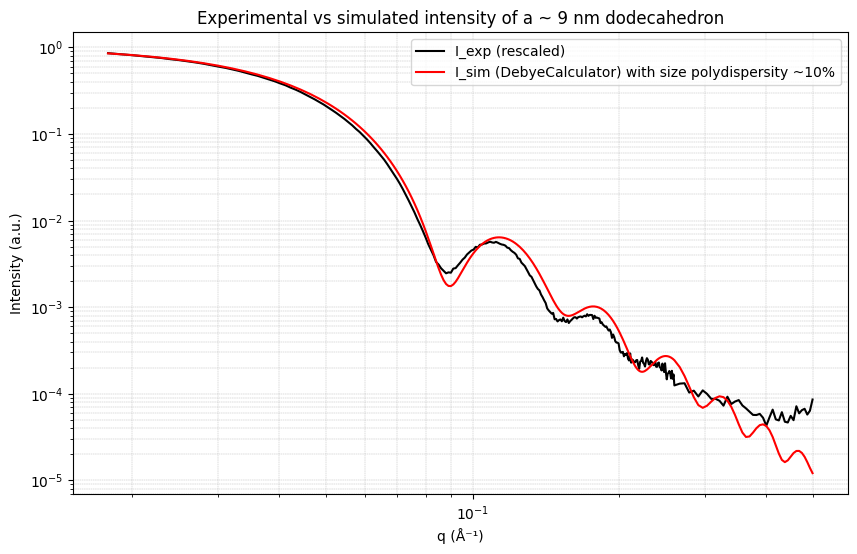

scale_factor 4.022838998532392


In [31]:
# Aligner q_exp et q_sim : construire q_common sûr puis interpoler
import numpy as np
import glob, re

# Paramètres 
qmin, qmax = 0.017, 0.5   # plage q que vous voulez comparer
central_size = 95
use_range = True
range_min, range_max = 85, 105 # range de la polydispersité

# Construire la liste des fichiers simulés et la sélection 
pattern = "benjamin_dodecahedrons/debye_dode/dode_*_debye.txt"
file_paths = sorted(glob.glob(pattern))
if len(file_paths) == 0:
    raise RuntimeError("Aucun fichier simulé trouvé. Vérifiez le pattern.")

available_sizes = []
file_map = {}
for p in file_paths:
    m = re.search(r'dode_(\d+)_debye\.txt$', p)
    if m:
        t = int(m.group(1))
        available_sizes.append(t)
        file_map[t] = p
available_sizes = np.array(sorted(set(available_sizes)), dtype=int)
print("available_sizes:", available_sizes.tolist())

# sélectionner sel_sizes (soit par range, soit par gaussienne comme vous préférez)
if use_range:
    sel_mask = (available_sizes >= range_min) & (available_sizes <= range_max)
    sel_sizes = available_sizes[sel_mask]
else:
    sigma = max(1.0, central_size * 0.20)
    raw_w = np.exp(-0.5 * ((available_sizes - central_size) / sigma) ** 2)
    sel_mask = np.abs(available_sizes - central_size) <= 3 * sigma
    sel_sizes = available_sizes[sel_mask]
if sel_sizes.size == 0:
    raise RuntimeError("Aucune taille simulée sélectionnée (sel_sizes vide).")

print("sel_sizes:", sel_sizes.tolist())

# --- Trouver l'intersection des plages q couvertes par les fichiers simulés sélectionnés ---
min_qs = []
max_qs = []
for t in sel_sizes:
    p = file_map.get(int(t))
    if p is None:
        continue
    data = np.loadtxt(p)
    qd = data[:,0]
    mask_range = (qd >= qmin) & (qd <= qmax)
    if np.any(mask_range):
        qd_sel = qd[mask_range]
        min_qs.append(qd_sel.min())
        max_qs.append(qd_sel.max())
    else:
        # Ce simulateur ne couvre pas la fenêtre qmin..qmax : on l'ignore pour l'intersection
        print(f"simulateur {t} n'a pas de points dans [{qmin},{qmax}] -> ignoré pour l'intersection")

if len(min_qs) == 0:
    raise RuntimeError("Aucun simulateur ne couvre la fenêtre q choisie.")

# plage commune strictement couverte par TOUS les simulateurs retenus
min_sim = max(min_qs)
max_sim = min(max_qs)
print(f"Simulated common q-range across selected files: [{min_sim:.6g}, {max_sim:.6g}]")

# maintenant intersecter avec la plage expérimentale choisie
q_common_min = max(qmin, min_sim)
q_common_max = min(qmax, max_sim)
if q_common_max <= q_common_min:
    raise RuntimeError("Intersection des plages q vide : agrandir qmin/qmax ou réduire la sélection de simulateurs.")

print(f"q_common range to use: [{q_common_min:.6g}, {q_common_max:.6g}]")

# --- Construire q_common avec le même nombre de points que q_exp dans [qmin,qmax] ---
mask_exp = (q_exp >= qmin) & (q_exp <= qmax)
q_exp_cut = q_exp[mask_exp]
I_exp_cut = I_exp[mask_exp]
if q_exp_cut.size == 0:
    raise RuntimeError("Aucune donnée expérimentale dans la plage qmin..qmax.")

# garder seulement les points expérimentaux qui tombent dans [q_common_min, q_common_max]
mask_qc = (q_exp_cut >= q_common_min) & (q_exp_cut <= q_common_max)
q_common = q_exp_cut[mask_qc]
# si la sous-sélection retire presque tout, on construit un grid linéaire avec même nombre de points que q_exp_cut
if q_common.size < max(10, int(0.2 * q_exp_cut.size)):
    N = q_exp_cut.size
    q_common = np.linspace(q_common_min, q_common_max, N)
    print(f"q_common construit par linspace avec N={N} points")
else:
    print(f"q_common using {q_common.size} experimental points inside intersection")

# --- Interpoler I_exp sur q_common (pour garantir même longueur) ---
I_exp_common = np.interp(q_common, q_exp, I_exp)

# --- Construire I_weighted par interpolation des simulations sur q_common ---
# Si vous avez une liste de poids 'weights' correspondant à sel_sizes, utilisez-la; sinon poids uniformes.
try:
    weights  # si défini précédemment dans le notebook
except NameError:
    weights = np.ones(sel_sizes.shape, dtype=float)
weights = weights / np.sum(weights)

I_weighted = np.zeros_like(q_common, dtype=float)
for t, w in zip(sel_sizes, weights):
    p = file_map.get(int(t))
    if p is None:
        continue
    data = np.loadtxt(p)
    qd, Id = data[:,0], data[:,1]
    # restreindre au window q_common_min..q_common_max avant interpolation
    mask_sim = (qd >= q_common_min) & (qd <= q_common_max)
    qd_sel = qd[mask_sim]
    Id_sel = Id[mask_sim]
    if qd_sel.size == 0:
        print(f"simulateur {t} n'a pas de points dans la plage commune -> ignoré")
        continue
    I_interp = np.interp(q_common, qd_sel, Id_sel, left=0.0, right=0.0)
    # normalisation par N si atoms_map existe (optionnel)
    if 'size' in globals() and 'atoms' in globals():
        # construire atoms_map si nécessaire
        try:
            atoms_map
        except NameError:
            atoms_map = dict(zip(size, atoms))
        if int(t) in atoms_map:
            N_t = atoms_map[int(t)]
            I_interp = I_interp * 2.0 / (N_t**2 * Z**2)
    I_weighted += w * I_interp

# --- Vérification des longueurs et fit ---
print("len(q_common)=", len(q_common))
print("len(I_exp_common)=", len(I_exp_common))
print("len(I_weighted)=", len(I_weighted))
if len(I_exp_common) != len(I_weighted):
    raise RuntimeError("Lengths still mismatch after interpolation — debug lengths above.")

# Option: fit linéaire I_exp_common = A * I_weighted + B
valid = np.isfinite(I_exp_common) & np.isfinite(I_weighted) & (I_weighted > 0)
if valid.sum() < 5:
    print("Attention: trop peu de points valides pour un fit stable.")
else:
    A, B = np.polyfit(I_weighted[valid], I_exp_common[valid], 1)
    print("A =", A, "B =", B)

# fitted exp data
I_exp_fitted =  (I_exp_common - B) / A

# tracer comparaison
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.loglog(q_common, I_exp_common/4, label='I_exp (rescaled)', color='k')
plt.loglog(q_common, I_weighted, label='I_sim (DebyeCalculator) with size polydispersity ~10%', color='r')
#plt.loglog(q_common, I_exp_fitted, label='I_sim polydisperse fitté')

plt.xlabel('q (Å⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Experimental vs simulated intensity of a ~ 9 nm dodecahedron')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.3)
plt.show()

scale_factor = I_exp_common[0]/I_weighted[0]
print("scale_factor", scale_factor)

In [178]:
import math
a = (2.87*math.sqrt(3))/2
print(a)

b = (4.09*math.sqrt(2))/2
print(b)

2.485492908861339
2.8920667350529796
